In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import timedelta
from pandas import DatetimeIndex
from pandas import Timestamp
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import time

%matplotlib inline

In [3]:
#read data
df = pd.read_csv('./data.csv')
df.head()

,Date,An Giang,Ba Ria - Vung Tau,Bac Giang,Bac Kan,Bac Lieu,Bac Ninh,Ben Tre,Binh Dinh,Binh Duong,...,Thai Nguyen,Thanh Hoa,Thua Thien Hue,Tien Giang,Ho Chi Minh,Tra Vinh,Tuyen Quang,Vinh Long,Vinh Phuc,Yen Bai
0,27/04/2021,0,0,0,0,0,0,0,0.0,0,...,0,0,0,0,0,0,0,0,0.0,0
1,28/04/2021,0,0,0,0,0,0,0,0.0,0,...,0,0,0,0,0,0,0,0,0.0,0
2,29/04/2021,0,0,0,0,0,0,0,0.0,0,...,0,0,0,0,1,0,0,0,0.0,0
3,30/04/2021,0,0,0,0,0,0,0,0.0,0,...,0,0,0,0,0,0,0,0,0.0,0
4,1/5/2021,0,0,0,0,0,0,0,0.0,0,...,0,0,0,0,0,0,0,0,0.0,0


In [4]:
df.iloc[np.where(df.isna().sum() !=0)[0]]

,Date,An Giang,Ba Ria - Vung Tau,Bac Giang,Bac Kan,Bac Lieu,Bac Ninh,Ben Tre,Binh Dinh,Binh Duong,...,Thai Nguyen,Thanh Hoa,Thua Thien Hue,Tien Giang,Ho Chi Minh,Tra Vinh,Tuyen Quang,Vinh Long,Vinh Phuc,Yen Bai
8,5/5/2021,0,0,0,0,0,0,0,0.0,0,...,0,0,0,0,0,0,0,0,0.0,0
29,26/05/2021,0,0,121,0,0,91,0,0.0,0,...,1,1,0,0,0,0,0,0,0.0,0
62,28/06/2021,0,0,33,0,0,16,0,0.0,40,...,0,0,0,0,218,0,0,0,0.0,0


In [5]:
# ép kiểu  String thành Datetime cho ngày
df["Date"]= pd.to_datetime(df["Date"], dayfirst = True)
df["Date"].head(3)

0   2021-04-27
1   2021-04-28
2   2021-04-29
Name: Date, dtype: datetime64[ns]

In [6]:
# lấy các tên cột là tỉnh thành 
province = df.columns[1:]
print(province)
print(province.size)

Index(['An Giang', 'Ba Ria - Vung Tau', 'Bac Giang', 'Bac Kan', 'Bac Lieu',
       'Bac Ninh', 'Ben Tre', 'Binh Dinh', 'Binh Duong', 'Binh Phuoc',
       'Binh Thuan', 'Ca Mau', 'Can Tho', 'Cao Bang', 'Da Nang', 'Dak Lak',
       'Dak Nong', 'Dien Bien', 'Dong Nai', 'Dong Thap', 'Gia Lai', 'Ha Nam',
       'Ha Giang', 'Ha Noi', 'Ha Tinh', 'Hai Duong', 'Hai Phong', 'Hau Giang',
       'Hoa Binh', 'Hung Yen', 'Khanh Hoa', 'Kien Giang', 'Kon Tum',
       'Lai Chau', 'Lam Dong', 'Lang Son', 'Lao Cai', 'Long An', 'Nam Dinh',
       'Nghe An', 'Ninh Binh', 'Ninh Thuan', 'Phu Tho', 'Phu Yen',
       'Quang Binh', 'Quang Nam', 'Quang Ngai', 'Quang Ninh', 'Quang Tri',
       'Soc Trang', 'Son La', 'Tay Ninh', 'Thai Binh', 'Thai Nguyen',
       'Thanh Hoa', 'Thua Thien Hue', 'Tien Giang', 'Ho Chi Minh', 'Tra Vinh',
       'Tuyen Quang', 'Vinh Long', 'Vinh Phuc', 'Yen Bai'],
      dtype='object')
63


In [7]:
# ghép xx ngày với với các từng thành 
# 1 tỉnh thành trải qua xx ngày
df_long = df.melt(id_vars=["Date"], value_vars = province, var_name='Province',value_name="Confirmed")
# kiem tra thanh pho HCM
df_long.loc[df_long.Province == "Ho Chi Minh"].head(3)

,Date,Province,Confirmed
12198,2021-04-27,Ho Chi Minh,0.0
12199,2021-04-28,Ho Chi Minh,0.0
12200,2021-04-29,Ho Chi Minh,1.0


In [8]:
datewise = df_long.groupby(["Date"]).agg({"Confirmed":'sum'})
datewise.tail(3)

,Confirmed
Date,
2021-11-25,12429.0
2021-11-26,13094.0
2021-11-27,13048.0


In [9]:
datewise.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 214 entries, 2021-04-27 to 2021-11-27
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Confirmed  214 non-null    float64
dtypes: float64(1)
memory usage: 3.3 KB


In [10]:
# lấy dữ liệu của riêng TP.HCM
HCM_data = df_long[df_long["Province"]== "Ho Chi Minh"]
datewise_HCM = HCM_data.groupby(["Date"]).agg({"Confirmed":'sum'})
datewise_HCM.tail(3)

,Confirmed
Date,
2021-11-25,1582.0
2021-11-26,1809.0
2021-11-27,1773.0


In [11]:
# lấy dữ liệu index Date cho cột Dates since
#  Dates since = từng hàng index - cho index ở vị trí 0
datewise_HCM["Days Since"] = datewise_HCM.index-datewise_HCM.index[0]
datewise_HCM["Days Since"] = datewise_HCM["Days Since"].dt.days
datewise_HCM.tail(3)

,Confirmed,Days Since
Date,,
2021-11-25,1582.0,212
2021-11-26,1809.0,213
2021-11-27,1773.0,214


In [12]:
# lấy dữ liệu 21 ngày gần nhất 
datewise_HCM = datewise_HCM[(datewise_HCM["Days Since"].count() - 21):]

In [13]:
train = datewise_HCM.iloc[:int(datewise_HCM.shape[0]*0.80)]
valid = datewise_HCM.iloc[int(datewise_HCM.shape[0]*0.80):]

In [14]:
day=2 # ngày sự đoánday=1 # ngày sự đoán

In [15]:
def plot_result(data_d,new_date_time_index, forecast, gcolor, gcase, gtitle):
    '''Hàm vẽ biểu đồ'''
    plt.figure(figsize=(13,7))
    plt.style.use('seaborn-white')
    plt.plot(data_d,label="Actual "+gcase,color=gcolor, linestyle='solid', linewidth = 3, marker='o', markerfacecolor=gcolor, markersize=12)
    plt.plot(new_date_time_index,forecast,label="Predicted "+gcase,color='black', linestyle='solid', linewidth = 3, marker='*', markerfacecolor='black', markersize=12)
    plt.xticks(rotation=60)
    plt.legend(frameon=True) 

In [53]:
# hàm tính dự báo mới
def new_forecast(prediction,new_prediction,new_date):
    # concat 2 dự doán lại
    forecast=np.concatenate((prediction,new_prediction))
    new_ar = []
    
    for single_timestamp in datewise_HCM.index:
        new_ar.append(pd.to_datetime(single_timestamp))
    
    #dự báo cho ngày mới
    for single_timestamp in new_date:
        new_ar.append(pd.to_datetime(single_timestamp))
    #tính ngày mới
    new_date_time_index = DatetimeIndex(new_ar, dtype='datetime64[ns]', name='Date', freq=None)

    return (forecast,new_date_time_index)

In [54]:
#  Tinh MAE va MSE
def eval_reg(y,y_p):
    # hàm tính các giá trị để đánh giá mô hình 
    print("Mean Absolute Error: ",mean_absolute_error(y,y_p))  
    print("Mean Squared Error: ", mean_squared_error(y, y_p))

In [58]:
def linearRegression_covid_19(train_d,valid_d,data_d,case):
    '''Hàm train  hồi qui tuyến tính'''
    # khởi tạo Model
    lin_reg=LinearRegression(normalize=True)
    # fit model
    lin_reg.fit(np.array(train["Days Since"]).reshape(-1,1),np.array(train_d).reshape(-1,1))
    # bắt đầu dự đoán dựa vào valid
    prediction_valid_linreg=lin_reg.predict(np.array(valid["Days Since"]).reshape(-1,1))
    print("Valid: ",prediction_valid_linreg)
    
    # gọm hàm tính các giá trị để đánh giá 
    eval_reg(valid_d,prediction_valid_linreg)
    
    prediction_linreg=lin_reg.predict(np.array(datewise_HCM["Days Since"]).reshape(-1,1))
    # khởi tạo 2 list để lưu Ngày và số ca nhiễm Covid-19 của ngày đó
    new_date=[]
    new_prediction_lr=[]
    
    #dự đoán số ngày tiếp theo 
    for i in range(1,day):
        new_date.append(datewise_HCM.index[-1]+timedelta(days=i))
        new_prediction_lr.append(lin_reg.predict(np.array(datewise_HCM["Days Since"].max()+i).reshape(-1,1))[0])
    
    # in dự đoán về  ngày và số ca nhiễm 
    for i in range(len(new_date)):
        print(new_date[i],new_prediction_lr[i])
    forecast_lr, new_date_time_index =new_forecast(prediction_linreg,new_prediction_lr,new_date)
    
    return (forecast_lr, new_date_time_index)

Confirmed Cases
Valid:  [[1586.50649351]]
Mean Absolute Error:  186.49350649350617
Mean Squared Error:  34779.82796424343
2021-11-28 00:00:00 [1610.21428571]
Execution Time 0.046875


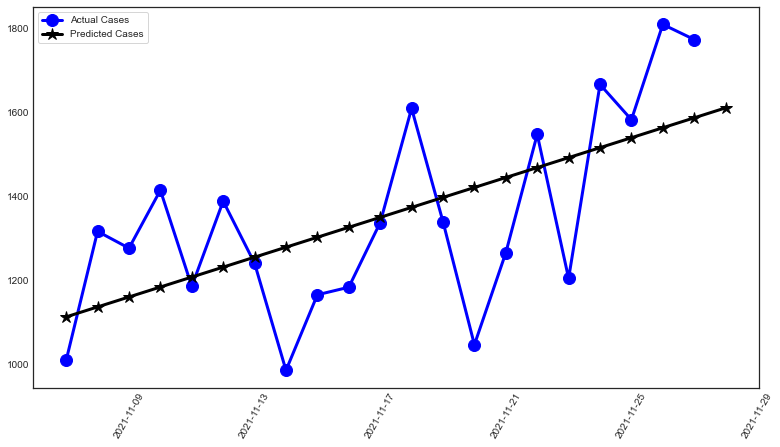

In [45]:
t1 = time.process_time()

forecast_lr_c, new_date_time_index_c = linearRegression_covid_19(train["Confirmed"],valid["Confirmed"],datewise_HCM["Confirmed"],'Confirmed Cases')
# vẽ biểu đồ 
plot_result(datewise_HCM["Confirmed"],new_date_time_index_c, forecast_lr_c,'blue','Cases', 'Linear Regression')
# tính thời gian thực hiện
elapsed_time_lr = time.process_time() - t1

print("Execution Time", elapsed_time_lr)

In [20]:
train = datewise_HCM.iloc[:]
valid = datewise_HCM.iloc[-1:]

### RandomForestRegression tụi em dùng để dự đoán ngày tiếp theo

In [56]:
def RandomForestRegression_covid_19(train_d,valid_d,data_d,case):
    # khởi tạo Model
    rf=RandomForestRegressor(n_estimators=100, random_state=42,n_jobs=-1)
    # train Model
    rf.fit(np.array(train["Days Since"]).reshape(-1,1),np.array(train_d).reshape(-1,1))
    # bắt đầu dự đoán dựa vào valid
    prediction_valid_rf=rf.predict(np.array(valid["Days Since"]).reshape(-1,1))
    
    # gọm hàm tính các giá trị để đánh giá 
    eval_reg(valid_d,prediction_valid_rf)
    
    # bắt đầu dự đoán dựa vào tập train
    prediction_rf=rf.predict(np.array(datewise_HCM["Days Since"]).reshape(-1,1))
    # khởi tạo 2 list để lưu Ngày và số ca nhiễm Covid-19 của ngày đó
    new_date=[]
    new_prediction_rf=[]
    
    # dự đoán số ngày tiếp theo 
    for i in range(1,day):
        new_date.append(datewise_HCM.index[-1]+timedelta(days=i))
        new_prediction_rf.append(rf.predict(np.array(datewise_HCM["Days Since"].max()+i).reshape(-1,1))[0]) 
    print (f"date :{new_date} , predicted confirmed case{new_prediction_rf}")
    forecast_rf, new_date_time_index = new_forecast(prediction_rf,new_prediction_rf,new_date)
    
    return (forecast_rf, new_date_time_index)

<ipython-input-56-4a76b561bbab>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(np.array(train["Days Since"]).reshape(-1,1),np.array(train_d).reshape(-1,1))


Mean Absolute Error:  17.710000000000036
Mean Squared Error:  313.6441000000013
date :[Timestamp('2021-11-28 00:00:00')] , predicted confirmed case[1755.29]
Execution Time 0.46875


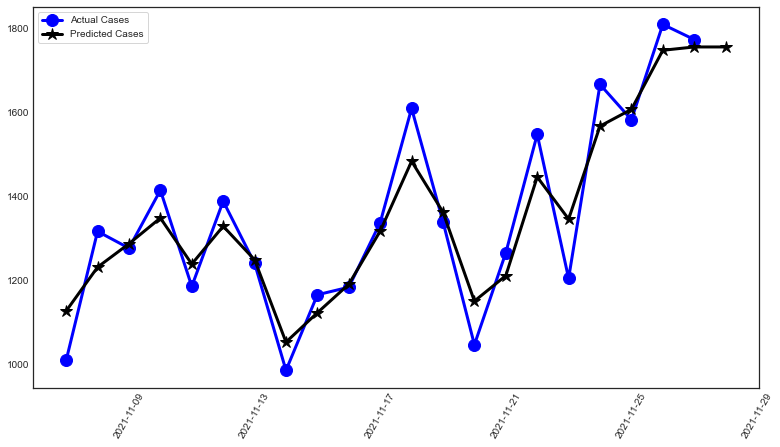

In [57]:
t2 = time.process_time()
forecast_lr_c, new_date_time_index_c = RandomForestRegression_covid_19(train["Confirmed"],valid["Confirmed"],datewise_HCM["Confirmed"],'Confirmed Cases')

# vẽ biểu đồ 
plot_result(datewise_HCM["Confirmed"],new_date_time_index_c, forecast_lr_c,'blue','Cases', 'Linear Regression')
# tính thời gian thực hiện
elapsed_time_RF = time.process_time() - t2
print("Execution Time", elapsed_time_RF)


In [28]:
print("Time for LR", elapsed_time_lr)
print("Time for RF", elapsed_time_RF)

Time for LR 0.078125
Time for RF 0.453125
